In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#df = pd.read_csv('train_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/SemiFinals/train_data.csv')
#promo = pd.read_csv('promotion_data.csv')
promo = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/SemiFinals/promotion_data.csv')
#vd = pd.read_csv('validation_data.csv')
vd = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/SemiFinals/validation_data.csv')
#td = pd.read_csv('test_data.csv')
td = pd.read_csv('https://raw.githubusercontent.com/ShamilaWije/DataStorm3/main/SemiFinals/test_data.csv')

df

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,1071115,12/19/2021,1
1,category_4,210652,2/13/2022,1
2,category_2,877624,12/19/2021,1
3,category_1,371104,12/19/2021,3
4,category_1,1090294,12/19/2021,3
...,...,...,...,...
20646,category_1,36898,10/12/2021,1
20647,category_2,111436,10/12/2021,1
20648,category_2,815101,10/12/2021,4
20649,category_3,1064572,10/12/2021,1


In [3]:
vd

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales
0,category_2,1006090,w1,0,9
1,category_2,1105009,w1,0,15
2,category_2,1098502,w3,0,7
3,category_1,1081321,w3,0,25
4,category_4,1074823,w1,0,24
...,...,...,...,...,...
368,category_2,40759,w1,0,52
369,category_2,1006090,w2,0,20
370,category_1,1090303,w1,0,12
371,category_2,1090276,w3,0,8


In [4]:
df['DateID'] = pd.to_datetime(df['DateID'])

df = df.sort_values('DateID')
df = df.reset_index(drop = True)
df

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,2021-10-01,1
1,category_4,245581,2021-10-01,6
2,category_2,1090258,2021-10-01,2
3,category_2,39436,2021-10-01,60
4,category_3,1090024,2021-10-01,4
...,...,...,...,...
20646,category_3,16936,2022-02-17,2
20647,category_1,371239,2022-02-17,2
20648,category_1,1030948,2022-02-17,2
20649,category_1,52099,2022-02-17,2


In [5]:
promo['PromotionStartDate'] = pd.to_datetime(promo['PromotionStartDate'])
promo['PromotionEndDate'] = pd.to_datetime(promo['PromotionEndDate'])

promo = promo.sort_values('PromotionStartDate')
promo = promo.reset_index(drop = True)
promo

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice
0,1066570,2021-10-01,2021-10-07,15,Percentage,45
1,267478,2021-10-01,2021-10-07,10,Percentage,130
2,1006009,2021-10-01,2021-10-07,10,Percentage,70
3,39436,2021-10-01,2021-10-07,25,Percentage,70
4,132334,2021-10-01,2021-10-07,10,Percentage,190
...,...,...,...,...,...,...
309,1066570,2022-03-11,2022-03-17,15,Percentage,45
310,1064572,2022-03-11,2022-03-17,10,Percentage,370
311,999403,2022-03-11,2022-03-17,10,Percentage,260
312,1076938,2022-03-11,2022-03-17,10,Percentage,80


In [6]:
#there is problem in coverting data to weeks with  2022-01-04 so we desaided to cover it in to
#2022-01-07 it will make it easier to standardize the data for the cost of accuracy

In [7]:
promo.PromotionStartDate.replace('2022-01-04','2022-01-07',inplace=True)
promo

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice
0,1066570,2021-10-01,2021-10-07,15,Percentage,45
1,267478,2021-10-01,2021-10-07,10,Percentage,130
2,1006009,2021-10-01,2021-10-07,10,Percentage,70
3,39436,2021-10-01,2021-10-07,25,Percentage,70
4,132334,2021-10-01,2021-10-07,10,Percentage,190
...,...,...,...,...,...,...
309,1066570,2022-03-11,2022-03-17,15,Percentage,45
310,1064572,2022-03-11,2022-03-17,10,Percentage,370
311,999403,2022-03-11,2022-03-17,10,Percentage,260
312,1076938,2022-03-11,2022-03-17,10,Percentage,80


In [8]:
def week_num(tgtdate):
    wDay = df.iloc[0,2]
    return(tgtdate-wDay).days//7 +1



In [9]:
promo['Week'] = promo['PromotionStartDate'].apply(lambda x : week_num(x))
promo

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,Week
0,1066570,2021-10-01,2021-10-07,15,Percentage,45,1
1,267478,2021-10-01,2021-10-07,10,Percentage,130,1
2,1006009,2021-10-01,2021-10-07,10,Percentage,70,1
3,39436,2021-10-01,2021-10-07,25,Percentage,70,1
4,132334,2021-10-01,2021-10-07,10,Percentage,190,1
...,...,...,...,...,...,...,...
309,1066570,2022-03-11,2022-03-17,15,Percentage,45,24
310,1064572,2022-03-11,2022-03-17,10,Percentage,370,24
311,999403,2022-03-11,2022-03-17,10,Percentage,260,24
312,1076938,2022-03-11,2022-03-17,10,Percentage,80,24


In [10]:
td

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,w4,0,NaN
1,category_1,43738,w4,0,NaN
2,category_2,1044502,w1,0,NaN
3,category_2,913561,w4,0,NaN
4,category_2,216151,w4,0,NaN
...,...,...,...,...,...
372,category_2,20824,w3,0,NaN
373,category_2,130993,w3,1,NaN
374,category_1,35449,w4,0,NaN
375,category_2,1010068,w1,0,NaN


In [11]:
td.Week.replace("w1",21,inplace=True)
td.Week.replace("w2",22,inplace=True)
td.Week.replace("w3",23,inplace=True)
td.Week.replace("w4",24,inplace=True)

vd.Week.replace("w1",21,inplace=True)
vd.Week.replace("w2",22,inplace=True)
vd.Week.replace("w3",23,inplace=True)
vd.Week.replace("w4",24,inplace=True)
td

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,24,0,NaN
1,category_1,43738,24,0,NaN
2,category_2,1044502,21,0,NaN
3,category_2,913561,24,0,NaN
4,category_2,216151,24,0,NaN
...,...,...,...,...,...
372,category_2,20824,23,0,NaN
373,category_2,130993,23,1,NaN
374,category_1,35449,24,0,NaN
375,category_2,1010068,21,0,NaN


In [12]:
vd

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales
0,category_2,1006090,21,0,9
1,category_2,1105009,21,0,15
2,category_2,1098502,23,0,7
3,category_1,1081321,23,0,25
4,category_4,1074823,21,0,24
...,...,...,...,...,...
368,category_2,40759,21,0,52
369,category_2,1006090,22,0,20
370,category_1,1090303,21,0,12
371,category_2,1090276,23,0,8


# finding discount items that has no data in training data set


In [13]:
co = promo[promo['Week'] > 20]
co

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,Week
268,1090024,2022-02-18,2022-02-24,20,Percentage,170,21
269,124954,2022-02-18,2022-02-24,25,Percentage,210,21
270,130993,2022-02-18,2022-02-24,10,Percentage,70,21
271,1077118,2022-02-18,2022-02-24,15,Percentage,80,21
272,1101571,2022-02-18,2022-02-24,10,Percentage,140,21
273,1076929,2022-02-18,2022-02-24,10,Percentage,280,21
274,50785,2022-02-18,2022-02-24,10,Percentage,65,21
275,23200,2022-02-18,2022-02-24,10,Percentage,320,21
276,1048975,2022-02-18,2022-02-24,10,Percentage,70,21
277,836152,2022-02-18,2022-02-24,10,Percentage,70,21


In [14]:
it = list(co['ItemCode'].unique())
it

[1090024,
 124954,
 130993,
 1077118,
 1101571,
 1076929,
 50785,
 23200,
 1048975,
 836152,
 1006108,
 1085749,
 17287,
 87559,
 59749,
 1064572,
 64978,
 1066570,
 30877,
 1010068,
 1071124,
 1090258,
 7666,
 1071106,
 1006090,
 40759,
 999403,
 1076938,
 20824]

In [15]:
coo = promo[promo['Week'] <= 20]
coo

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,Week
0,1066570,2021-10-01,2021-10-07,15,Percentage,45,1
1,267478,2021-10-01,2021-10-07,10,Percentage,130,1
2,1006009,2021-10-01,2021-10-07,10,Percentage,70,1
3,39436,2021-10-01,2021-10-07,25,Percentage,70,1
4,132334,2021-10-01,2021-10-07,10,Percentage,190,1
...,...,...,...,...,...,...,...
263,124954,2022-02-11,2022-02-17,10,Percentage,210,20
264,836152,2022-02-11,2022-02-17,10,Percentage,70,20
265,17287,2022-02-11,2022-02-17,10,Percentage,70,20
266,50785,2022-02-11,2022-02-17,10,Percentage,65,20


In [16]:
ito = list(coo['ItemCode'].unique())
ito

[1066570,
 267478,
 1006009,
 39436,
 132334,
 24136,
 65788,
 35530,
 903976,
 7666,
 1074823,
 17287,
 117610,
 1090258,
 23200,
 37861,
 1048975,
 1075651,
 172033,
 23569,
 1076938,
 755584,
 132028,
 124954,
 40759,
 1085749,
 17296,
 379249,
 745945,
 1006099,
 20824,
 999403,
 30877,
 1090240,
 1090276,
 1076929,
 836125,
 130993,
 1090249,
 41830,
 50785,
 64978,
 1006108,
 119554,
 399220,
 1010068,
 836152,
 59749,
 815101,
 1006090,
 1101553,
 1101562,
 1101571,
 872260,
 1081069,
 1013335,
 753613,
 1064473,
 1082743,
 1090024,
 1077118,
 687616]

In [17]:
list(set(it)&set(ito))

[1101571,
 17287,
 1006090,
 1048975,
 1010068,
 124954,
 1006108,
 30877,
 23200,
 130993,
 1085749,
 40759,
 836152,
 1076929,
 1066570,
 1076938,
 64978,
 1090258,
 20824,
 50785,
 59749,
 1090024,
 999403,
 7666,
 1077118]

In [18]:
for i,n in enumerate(ito):
  if n in it:
    it.remove(n)


it

[87559, 1064572, 1071124, 1071106]

# _

In [19]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

CategoryCode      4
ItemCode        197
DateID          140
DailySales      162
dtype: int64

In [20]:
# check for null values
df.isnull().sum()

CategoryCode    0
ItemCode        0
DateID          0
DailySales      0
dtype: int64

In [21]:

df['Week'] = df['DateID'].apply(lambda x : week_num(x))
df

,CategoryCode,ItemCode,DateID,DailySales,Week
0,category_2,117610,2021-10-01,1,1
1,category_4,245581,2021-10-01,6,1
2,category_2,1090258,2021-10-01,2,1
3,category_2,39436,2021-10-01,60,1
4,category_3,1090024,2021-10-01,4,1
...,...,...,...,...,...
20646,category_3,16936,2022-02-17,2,20
20647,category_1,371239,2022-02-17,2,20
20648,category_1,1030948,2022-02-17,2,20
20649,category_1,52099,2022-02-17,2,20


In [22]:
df = df.groupby(['Week', 'ItemCode', 'CategoryCode']).DailySales.agg([sum]).reset_index()
df

,Week,ItemCode,CategoryCode,sum
0,1,3418,category_1,45
1,1,3427,category_1,28
2,1,7666,category_3,141
3,1,9925,category_2,7
4,1,16936,category_3,31
...,...,...,...,...
3828,20,1101769,category_2,35
3829,20,1103056,category_2,10
3830,20,1105009,category_2,9
3831,20,1105018,category_2,4


In [23]:
df = df.rename(columns={'sum': 'Sales'})
df

,Week,ItemCode,CategoryCode,Sales
0,1,3418,category_1,45
1,1,3427,category_1,28
2,1,7666,category_3,141
3,1,9925,category_2,7
4,1,16936,category_3,31
...,...,...,...,...
3828,20,1101769,category_2,35
3829,20,1103056,category_2,10
3830,20,1105009,category_2,9
3831,20,1105018,category_2,4


In [24]:
df['CategoryCode'].value_counts()

category_2    1755
category_1    1342
category_3     434
category_4     302
Name: CategoryCode, dtype: int64

In [25]:
df.CategoryCode.replace('category_1',1,inplace=True)
df.CategoryCode.replace('category_2',2,inplace=True)
df.CategoryCode.replace('category_3',3,inplace=True)
df.CategoryCode.replace('category_4',4,inplace=True)
df

,Week,ItemCode,CategoryCode,Sales
0,1,3418,1,45
1,1,3427,1,28
2,1,7666,3,141
3,1,9925,2,7
4,1,16936,3,31
...,...,...,...,...
3828,20,1101769,2,35
3829,20,1103056,2,10
3830,20,1105009,2,9
3831,20,1105018,2,4


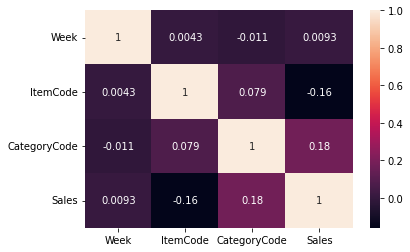

In [26]:
cor = df.corr()
sns.heatmap(cor, annot=True)

In [27]:
def validation():
  pass

In [28]:
item = list(df['ItemCode'].unique())
print(len(item))

197


In [29]:
item

[3418,
 3427,
 7666,
 9925,
 16936,
 17287,
 17296,
 20824,
 23200,
 23569,
 24136,
 30877,
 32245,
 35449,
 35530,
 35584,
 36898,
 37510,
 37861,
 38518,
 39436,
 40759,
 41830,
 42424,
 42496,
 43630,
 43657,
 43738,
 48940,
 50785,
 52099,
 57058,
 59047,
 59749,
 64978,
 65788,
 75886,
 76399,
 86974,
 86992,
 87046,
 87559,
 88450,
 99079,
 110320,
 111382,
 111436,
 117610,
 118033,
 119554,
 123307,
 124774,
 124954,
 130993,
 131983,
 132028,
 132334,
 138742,
 142756,
 145330,
 145978,
 169504,
 172033,
 172582,
 173617,
 174436,
 210652,
 210868,
 211309,
 213802,
 216151,
 225259,
 245581,
 248272,
 262384,
 267478,
 370195,
 371104,
 371239,
 379249,
 397213,
 399220,
 416212,
 687616,
 731104,
 745945,
 753613,
 755584,
 815101,
 836125,
 836152,
 836584,
 837943,
 838456,
 839356,
 839374,
 858886,
 865933,
 872260,
 877624,
 903976,
 904984,
 906586,
 906595,
 913561,
 999403,
 1003147,
 1003156,
 1003183,
 1003192,
 1006009,
 1006090,
 1006099,
 1006108,
 1010068,
 101

In [30]:

dfm = pd.merge(df,promo,on=['Week','ItemCode'],how='left')
dfm.drop(['PromotionStartDate','PromotionEndDate','SellingPrice'], axis=1, inplace=True)
dfm.fillna(0, inplace=True)
dfm

,Week,ItemCode,CategoryCode,Sales,DiscountValue,DiscountType
0,1,3418,1,45,0.0,0
1,1,3427,1,28,0.0,0
2,1,7666,3,141,20.0,Percentage
3,1,9925,2,7,0.0,0
4,1,16936,3,31,0.0,0
...,...,...,...,...,...,...
3828,20,1101769,2,35,0.0,0
3829,20,1103056,2,10,0.0,0
3830,20,1105009,2,9,0.0,0
3831,20,1105018,2,4,0.0,0


In [31]:
dfm

,Week,ItemCode,CategoryCode,Sales,DiscountValue,DiscountType
0,1,3418,1,45,0.0,0
1,1,3427,1,28,0.0,0
2,1,7666,3,141,20.0,Percentage
3,1,9925,2,7,0.0,0
4,1,16936,3,31,0.0,0
...,...,...,...,...,...,...
3828,20,1101769,2,35,0.0,0
3829,20,1103056,2,10,0.0,0
3830,20,1105009,2,9,0.0,0
3831,20,1105018,2,4,0.0,0


In [32]:
print(int(dfm[dfm.ItemCode == 23200][dfm.Week == 5]['Sales']))

94


In [33]:
for n in item:
  if len(dfm[dfm.ItemCode == n]['Week']) != 20:
    print(n)

23200
52099
75886
76399
86974
87046
124774
248272
267478
687616
731104
836584
839374
872260
903976
904984
1003147
1003156
1003183
1024810
1061341
1061638
1066570
1068883
1074823
1076929
1077118
1081321
1081339
1084498
1090249
1090258
1090294
1090303
1101553
1101769
893824
1075651
1081087
1097143
1103056
1105009
1105018
267496
1105027


In [34]:
def model_MJ(item,week,Discount):
  w20 = []
  Sales = []
  DiscountValue = []

  train_ = pd.DataFrame()

  for n in range(1,21):
    w20.append(n)
  

  for n in range(1,21):
    if dfm[dfm.ItemCode == item][dfm.Week == n]['DiscountValue'].empty:
      DiscountValue.append(0)
    else:
      DiscountValue.append(int(dfm[dfm.ItemCode == item][dfm.Week == n]['DiscountValue']))


  for n in range(1,21):
    if dfm[dfm.ItemCode == item][dfm.Week == n]['Sales'].empty:
      Sales.append(0)
    else:
      Sales.append(int(dfm[dfm.ItemCode == item][dfm.Week == n]['Sales']))


  train_['Week'] = w20
  train_['DiscountValue'] = DiscountValue
  train_['Sales'] = Sales

  reg = LinearRegression()
  reg.fit(train_[['Week','DiscountValue']],train_.Sales)
  predi = reg.predict([[week,Discount]])
  print(f"prediction === {predi}")

  coef = reg.coef_

  inter = reg.intercept_

  print(f"coef == {coef} //   inter == {inter}")

  return train_

  # for index, row in dfm.iterrows():

  #   train_ = pd.DataFrame()
  #   train_['Week'] = list(range(21))

  # train_ = pd.concat([ ffdf['Week'],ffdf[item[1]] ], axis=1)
  # ca



  # reg = LinearRegression()
  # reg.fit(ca[['Week']],ffdf[[item[0]]])


In [35]:
# item     week      Discount

model_MJ(23200,11,30)

prediction === [153.62190935]
coef == [-0.20809085  4.97599771] //   inter == 6.63097743960482


,Week,DiscountValue,Sales
0,1,0,8
1,2,0,17
2,3,0,26
3,4,0,10
4,5,25,94
5,6,25,84
6,7,10,37
7,8,10,41
8,9,30,168
9,10,30,197


In [36]:
def model_MJ1(item,week,Discount):
  w20 = []
  Sales = []
  DiscountValue = []

  train_ = pd.DataFrame()

  for n in range(1,21):
    w20.append(n)
  

  for n in range(1,21):
    if dfm[dfm.ItemCode == item][dfm.Week == n]['DiscountValue'].empty:
      DiscountValue.append(0)
    else:
      DiscountValue.append(int(dfm[dfm.ItemCode == item][dfm.Week == n]['DiscountValue']))


  for n in range(1,21):
    if dfm[dfm.ItemCode == item][dfm.Week == n]['Sales'].empty:
      Sales.append(0)
    else:
      Sales.append(int(dfm[dfm.ItemCode == item][dfm.Week == n]['Sales']))


  train_['Week'] = w20
  train_['DiscountValue'] = DiscountValue
  train_['Sales'] = Sales

  reg = LinearRegression()
  reg.fit(train_[['Week','DiscountValue']],train_.Sales)
  predi = reg.predict([[week,Discount]])
  #print(f"prediction === {predi}")

  coef = reg.coef_

  inter = reg.intercept_

  #print(f"coef == {coef} //   inter == {inter}")

  return predi

In [37]:
def proper_round(num, dec=0):
    num = str(num)[:str(num).index('.')+dec+2]
    if num[-1]>='5':
        return float(num[:-2-(not dec)]+str(int(num[-2-(not dec)])+1))
    return float(num[:-1])

In [38]:
proper_round(float(model_MJ1(23200,11,30)), dec=0)

154.0

In [39]:
vd

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales
0,category_2,1006090,21,0,9
1,category_2,1105009,21,0,15
2,category_2,1098502,23,0,7
3,category_1,1081321,23,0,25
4,category_4,1074823,21,0,24
...,...,...,...,...,...
368,category_2,40759,21,0,52
369,category_2,1006090,22,0,20
370,category_1,1090303,21,0,12
371,category_2,1090276,23,0,8


In [40]:
vdm = pd.merge(vd,promo,on=['Week','ItemCode'],how='left')
vdm.drop(['PromotionStartDate','PromotionEndDate','SellingPrice'], axis=1, inplace=True)
vdm.fillna(0, inplace=True)
vdm

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,DiscountValue,DiscountType
0,category_2,1006090,21,0,9,0.0,0
1,category_2,1105009,21,0,15,0.0,0
2,category_2,1098502,23,0,7,0.0,0
3,category_1,1081321,23,0,25,0.0,0
4,category_4,1074823,21,0,24,0.0,0
...,...,...,...,...,...,...,...
368,category_2,40759,21,0,52,0.0,0
369,category_2,1006090,22,0,20,0.0,0
370,category_1,1090303,21,0,12,0.0,0
371,category_2,1090276,23,0,8,0.0,0


In [41]:
# item     week      Discount
veri = []
for x in range(373):
    veri.append(float(model_MJ1(vdm.iloc[x][1],vdm.iloc[x][2],vdm.iloc[x][5])))
    
veri
    

[26.04750593824228,
 8.747368421052633,
 6.265413533834586,
 8.648120300751879,
 -51.42182416974646,
 41.63464566929134,
 57.87894736842105,
 22.55263157894737,
 16.07593984962406,
 57.62904318374259,
 18.34511278195489,
 56.189473684210526,
 50.30014347202297,
 85.08996229971724,
 10.58421052631579,
 11.999248120300752,
 59.10526315789473,
 92.0842105263158,
 510.63157894736844,
 0.5020263734025843,
 23.97368421052632,
 7.390225563909775,
 4.0690072639225185,
 21.97218045112782,
 32.73315217391304,
 19.749122807017542,
 3.5172359015091343,
 33.85170509905814,
 26.932330827067673,
 164.5,
 82.32105263157895,
 11.163224446786089,
 11.181954887218044,
 12.579699248120301,
 55.08947368421053,
 28.78195488721805,
 29.20451127819549,
 44.732283464566926,
 403.2751879699248,
 33.40416666666666,
 17.69587628865978,
 12.657894736842106,
 7.623308270676692,
 -0.2378922208943468,
 14.395488721804513,
 45.19172932330827,
 13.394736842105267,
 57.42396274343776,
 21.25964912280702,
 98.23287671232

In [42]:
veri1 = [0 if i < 0 else i for i in veri]
veri1

[26.04750593824228,
 8.747368421052633,
 6.265413533834586,
 8.648120300751879,
 0,
 41.63464566929134,
 57.87894736842105,
 22.55263157894737,
 16.07593984962406,
 57.62904318374259,
 18.34511278195489,
 56.189473684210526,
 50.30014347202297,
 85.08996229971724,
 10.58421052631579,
 11.999248120300752,
 59.10526315789473,
 92.0842105263158,
 510.63157894736844,
 0.5020263734025843,
 23.97368421052632,
 7.390225563909775,
 4.0690072639225185,
 21.97218045112782,
 32.73315217391304,
 19.749122807017542,
 3.5172359015091343,
 33.85170509905814,
 26.932330827067673,
 164.5,
 82.32105263157895,
 11.163224446786089,
 11.181954887218044,
 12.579699248120301,
 55.08947368421053,
 28.78195488721805,
 29.20451127819549,
 44.732283464566926,
 403.2751879699248,
 33.40416666666666,
 17.69587628865978,
 12.657894736842106,
 7.623308270676692,
 0,
 14.395488721804513,
 45.19172932330827,
 13.394736842105267,
 57.42396274343776,
 21.25964912280702,
 98.23287671232876,
 31.136842105263156,
 5.474436

In [43]:
vdm['PredictedSales'] = veri1
vdm

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,DiscountValue,DiscountType,PredictedSales
0,category_2,1006090,21,0,9,0.0,0,26.047506
1,category_2,1105009,21,0,15,0.0,0,8.747368
2,category_2,1098502,23,0,7,0.0,0,6.265414
3,category_1,1081321,23,0,25,0.0,0,8.648120
4,category_4,1074823,21,0,24,0.0,0,0.000000
...,...,...,...,...,...,...,...,...
368,category_2,40759,21,0,52,0.0,0,57.218882
369,category_2,1006090,22,0,20,0.0,0,26.852019
370,category_1,1090303,21,0,12,0.0,0,11.621053
371,category_2,1090276,23,0,8,0.0,0,3.582082


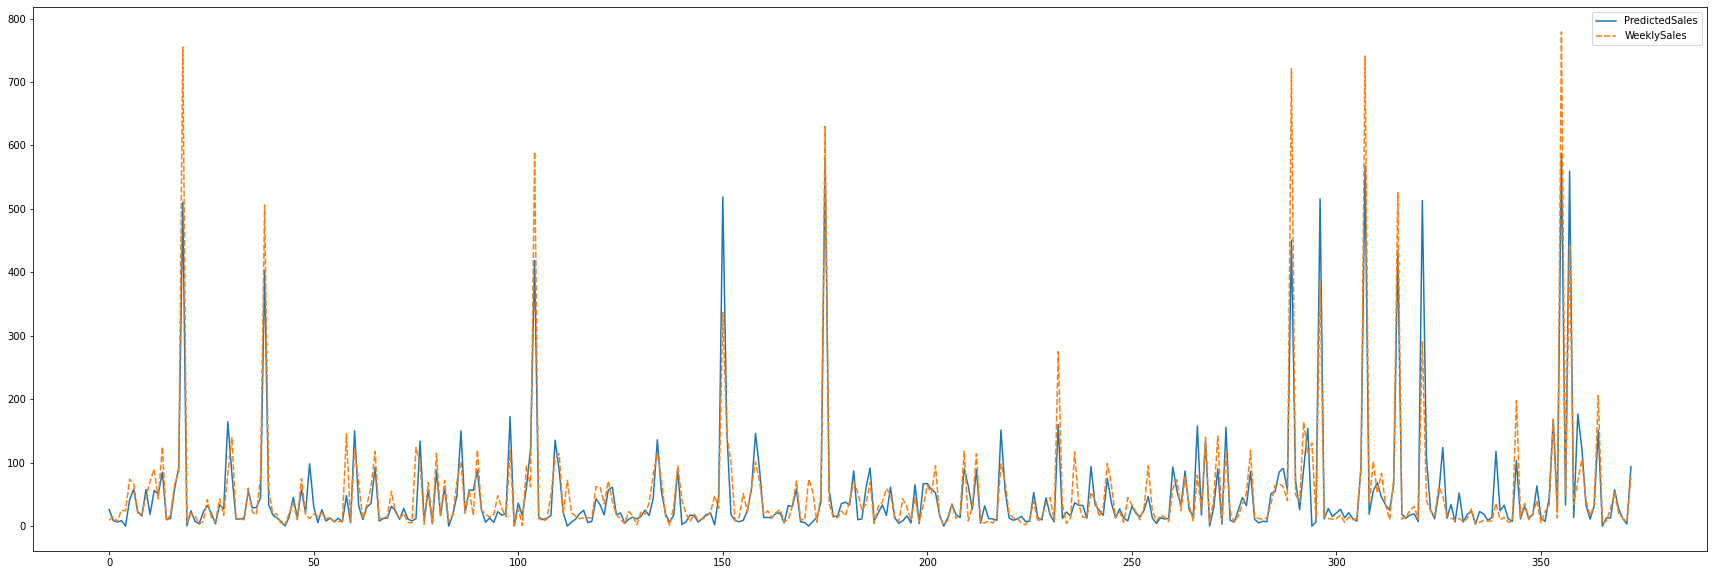

In [44]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=vdm[['PredictedSales','WeeklySales']])

In [45]:
vdm[vdm.ItemCode == 1071106]

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,DiscountValue,DiscountType,PredictedSales
10,category_2,1071106,23,0,70,0.0,0,18.345113
152,category_2,1071106,24,1,101,10.0,Percentage,17.888722
308,category_2,1071106,22,0,36,0.0,0,18.801504
319,category_2,1071106,21,0,31,0.0,0,19.257895


In [46]:
vd[vd.ItemCode == 1071124]

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales


# Validation

MAPE (Under Forecast)

In [47]:
BUF = 0

In [48]:
MAPE = 0.00000
UFE = 0.00000
for x in range(373):
  if vdm.iloc[x][4] > (vdm.iloc[x][7]):
    UFE = UFE + (vdm.iloc[x][4] - (proper_round(vdm.iloc[x][7], dec=0)))
    

SUMAS = 0
for x in range(373):
  SUMAS = SUMAS + vdm.iloc[x][4]


MAPE = UFE/SUMAS
print(f"Under Forecast Error = {UFE}")
print(f"Sum of Actual Sales = {SUMAS}")
print("")
print(f"MAPE (Under Forecast) = {MAPE}")

Under Forecast Error = 4490.0
Sum of Actual Sales = 20377

MAPE (Under Forecast) = 0.22034646905825195


Total Mean Absolute Percentage Error (Total MAPE)

In [49]:
TMAPE = 0.00000

AS = []
PS = []

for i in range(373):
  AS.append(vdm.iloc[i][4])

for i in range(373):
  PS.append(vdm.iloc[i][7])

UPSUM = 0.00000
for i in range(373):
  UPSUM = UPSUM + abs(proper_round(PS[i], dec=0) - AS[i])

TMAPE = UPSUM/SUMAS
TMAPE


0.39799774255287823

In [50]:
PS

[26.04750593824228,
 8.747368421052633,
 6.265413533834586,
 8.648120300751879,
 0.0,
 41.63464566929134,
 57.87894736842105,
 22.55263157894737,
 16.07593984962406,
 57.62904318374259,
 18.34511278195489,
 56.189473684210526,
 50.30014347202297,
 85.08996229971724,
 10.58421052631579,
 11.999248120300752,
 59.10526315789473,
 92.0842105263158,
 510.63157894736844,
 0.5020263734025843,
 23.97368421052632,
 7.390225563909775,
 4.0690072639225185,
 21.97218045112782,
 32.73315217391304,
 19.749122807017542,
 3.5172359015091343,
 33.85170509905814,
 26.932330827067673,
 164.5,
 82.32105263157895,
 11.163224446786089,
 11.181954887218044,
 12.579699248120301,
 55.08947368421053,
 28.78195488721805,
 29.20451127819549,
 44.732283464566926,
 403.2751879699248,
 33.40416666666666,
 17.69587628865978,
 12.657894736842106,
 7.623308270676692,
 0.0,
 14.395488721804513,
 45.19172932330827,
 13.394736842105267,
 57.42396274343776,
 21.25964912280702,
 98.23287671232876,
 31.136842105263156,
 5.47

In [51]:
UPSUM

8110.0

# Submission

In [52]:
td

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,24,0,NaN
1,category_1,43738,24,0,NaN
2,category_2,1044502,21,0,NaN
3,category_2,913561,24,0,NaN
4,category_2,216151,24,0,NaN
...,...,...,...,...,...
372,category_2,20824,23,0,NaN
373,category_2,130993,23,1,NaN
374,category_1,35449,24,0,NaN
375,category_2,1010068,21,0,NaN


In [53]:
tdm = pd.merge(td,promo,on=['Week','ItemCode'],how='left')
tdm.drop(['PromotionStartDate','PromotionEndDate','SellingPrice'], axis=1, inplace=True)
tdm.fillna(0, inplace=True)
tdm

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,DiscountValue,DiscountType
0,category_1,1048975,24,0,0.0,0.0,0
1,category_1,43738,24,0,0.0,0.0,0
2,category_2,1044502,21,0,0.0,0.0,0
3,category_2,913561,24,0,0.0,0.0,0
4,category_2,216151,24,0,0.0,0.0,0
...,...,...,...,...,...,...,...
372,category_2,20824,23,0,0.0,0.0,0
373,category_2,130993,23,1,0.0,10.0,Percentage
374,category_1,35449,24,0,0.0,0.0,0
375,category_2,1010068,21,0,0.0,0.0,0


In [54]:
# item     week      Discount
for i in range(377):
  tdm.iat[i,4] = model_MJ1(tdm.iloc[i][1],tdm.iloc[i][2],tdm.iloc[i][5])

In [55]:
tdm

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,DiscountValue,DiscountType
0,category_1,1048975,24,0,34.511811,0.0,0
1,category_1,43738,24,0,28.618797,0.0,0
2,category_2,1044502,21,0,11.157895,0.0,0
3,category_2,913561,24,0,6.546617,0.0,0
4,category_2,216151,24,0,15.585714,0.0,0
...,...,...,...,...,...,...,...
372,category_2,20824,23,0,118.321014,0.0,0
373,category_2,130993,23,1,50.157915,10.0,Percentage
374,category_1,35449,24,0,23.348120,0.0,0
375,category_2,1010068,21,0,5.782898,0.0,0


In [56]:
tdm['fPredictedSales'] = tdm.PredictedSales.apply(lambda x: proper_round(x))
tdm['fPredictedSales'] = tdm['fPredictedSales'].astype(str).apply(lambda x: x.replace('.0',''))
num = tdm._get_numeric_data()
num[num < 0] = 0
tdm

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,DiscountValue,DiscountType,fPredictedSales
0,category_1,1048975,24,0,34.511811,0.0,0,35
1,category_1,43738,24,0,28.618797,0.0,0,29
2,category_2,1044502,21,0,11.157895,0.0,0,11
3,category_2,913561,24,0,6.546617,0.0,0,7
4,category_2,216151,24,0,15.585714,0.0,0,16
...,...,...,...,...,...,...,...,...
372,category_2,20824,23,0,118.321014,0.0,0,118
373,category_2,130993,23,1,50.157915,10.0,Percentage,50
374,category_1,35449,24,0,23.348120,0.0,0,23
375,category_2,1010068,21,0,5.782898,0.0,0,6


In [57]:
tdm[tdm.ItemCode == 1032568]

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,DiscountValue,DiscountType,fPredictedSales
193,category_1,1032568,22,0,0.0,0.0,0,-7
222,category_1,1032568,24,0,0.0,0.0,0,-10
278,category_1,1032568,21,0,0.0,0.0,0,-5
334,category_1,1032568,23,0,0.0,0.0,0,-8


In [58]:
submission_file = pd.DataFrame()

In [59]:
submission_file['CategoryCode'] = tdm['CategoryCode']
submission_file['ItemCode'] = tdm['ItemCode']
submission_file['Week'] = tdm['Week']
submission_file['OnPromo'] = tdm['OnPromo']
submission_file['PredictedSales'] = tdm['fPredictedSales']
submission_file

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,24,0,35
1,category_1,43738,24,0,29
2,category_2,1044502,21,0,11
3,category_2,913561,24,0,7
4,category_2,216151,24,0,16
...,...,...,...,...,...
372,category_2,20824,23,0,118
373,category_2,130993,23,1,50
374,category_1,35449,24,0,23
375,category_2,1010068,21,0,6


In [60]:
submission_file.to_csv('submission.csv', index=False)

In [61]:
dfm[dfm.ItemCode == 1064572]

,Week,ItemCode,CategoryCode,Sales,DiscountValue,DiscountType
146,1,1064572,3,7,0.0,0
333,2,1064572,3,7,0.0,0
523,3,1064572,3,8,0.0,0
708,4,1064572,3,11,0.0,0
898,5,1064572,3,20,0.0,0
1093,6,1064572,3,10,0.0,0
1286,7,1064572,3,15,0.0,0
1480,8,1064572,3,11,0.0,0
1671,9,1064572,3,6,0.0,0
1867,10,1064572,3,12,0.0,0


In [62]:
tdm.iloc[373][5]

10.0